In [1]:
# Create venv to fix import / dependency issues
!activate mldevenvver3-9-19

In [2]:
# %pip install tensorflow

In [3]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models

In [4]:
# Load dataset and split into test and train -> X = input (images), y = output (labels, i.e. "7")
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Normalize the images grayscale from 0-255 to 0-1 scale
X_train, X_test = X_train/255.0, X_test/255.0

# Reshape images to fit the CNN input requirements
X_train = X_train.reshape((60000, 28, 28, 1)) # 60000 images, 28x28 pixels, 1 colour channel (grayscale)
X_test = X_test.reshape((10000, 28, 28, 1))   # 10000 images, 28x28 pixels, 1 colour channel (grayscale)

In [6]:
# Define the CNN model
model = models.Sequential([
    layers.InputLayer(shape=(28, 28, 1)), # Match reshaped pictures
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output neurons for 10 possible outputs (0 - 9)
])

In [7]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Set up early stopping callback to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=2, restore_best_weights=True, verbose=1)

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8896 - loss: 0.3494 - val_accuracy: 0.9853 - val_loss: 0.0433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9904 - val_loss: 0.0303
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.9907 - val_loss: 0.0258
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9908 - val_loss: 0.0295
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9942 - loss: 0.0171 - val_accuracy: 0.9912 - val_loss: 0.0306
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9919 - val_loss: 0.0300
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9959 - loss: 0.0125 - val_accuracy: 0.9921 - val_loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9971 - loss: 0

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

Test accuracy: 0.9921000003814697, Test loss: 0.028347043320536613


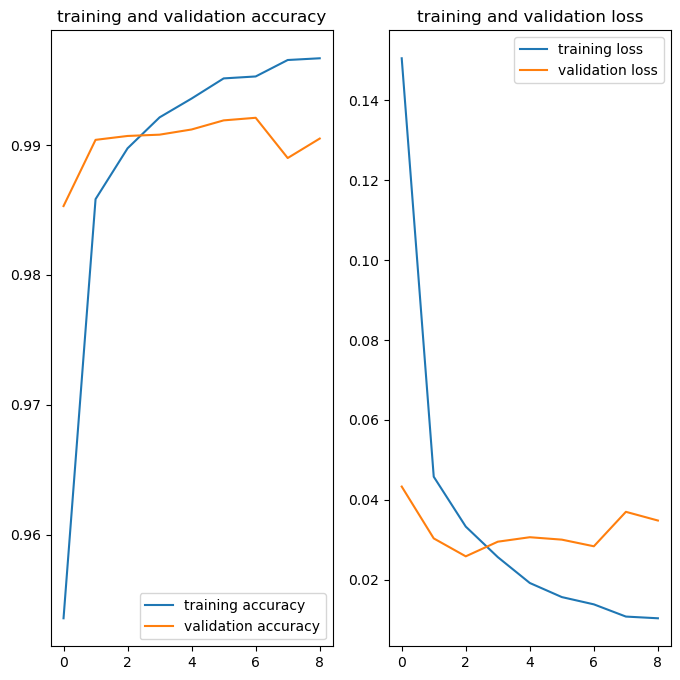

In [10]:
# Visually validate model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(0, len(acc))
# ymax = max(val_acc)
# xpos = val_acc.index(ymax)
# xmax = epochs_range[xpos]

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
# plt.annotate('*', xy=(xmax, ymax))
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [11]:
# Save trained model for easy use later
model.save('digit_classification_model.keras')